<a href="https://colab.research.google.com/github/singhania0601/OBJECT-DETECTION/blob/main/OBJECT_DETECTION_USING_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [2]:
yolo = cv2.dnn.readNet("/content/yolov3-tiny.weights","/content/yolov3-tiny.cfg")

In [5]:
classes = []
with open ("/content/coco.names") as f:
  classes = f.read().splitlines(True)

In [34]:
len(classes)

80

In [35]:
img = cv2.imread("/content/download.jpeg")


In [36]:
blob = cv2.dnn.blobFromImage(img,1/255,(320,320),(0,0,0),swapRB = True,crop = False)

In [37]:
blob

array([[[[0.92549026, 0.92549026, 0.92549026, ..., 0.36862746,
          0.40784317, 0.40784317],
         [0.92549026, 0.92549026, 0.92549026, ..., 0.3372549 ,
          0.3647059 , 0.3647059 ],
         [0.92549026, 0.92549026, 0.92549026, ..., 0.28627452,
          0.29411766, 0.29411766],
         ...,
         [0.81568635, 0.8117648 , 0.8078432 , ..., 0.854902  ,
          0.8745099 , 0.8745099 ],
         [0.8352942 , 0.8313726 , 0.8235295 , ..., 0.8431373 ,
          0.8588236 , 0.8588236 ],
         [0.85098046, 0.8431373 , 0.8352942 , ..., 0.8352942 ,
          0.85098046, 0.85098046]],

        [[0.9843138 , 0.9843138 , 0.9843138 , ..., 0.43137258,
          0.47058827, 0.47058827],
         [0.9843138 , 0.9843138 , 0.9843138 , ..., 0.40000004,
          0.427451  , 0.427451  ],
         [0.9843138 , 0.9843138 , 0.9843138 , ..., 0.34901962,
          0.35686275, 0.35686275],
         ...,
         [0.8196079 , 0.81568635, 0.8117648 , ..., 0.8588236 ,
          0.8745099 , 0.8

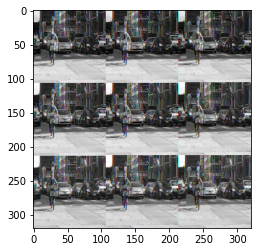

In [38]:
i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [39]:
yolo.setInput(blob)
output_layers_name = yolo.getUnconnectedOutLayersNames()
layerOutput = yolo.forward(output_layers_name)

In [40]:
img.shape


(184, 274, 3)

In [46]:
layerOutput

[array([[0.07796182, 0.0774803 , 0.23044977, ..., 0.        , 0.        ,
         0.        ],
        [0.06023564, 0.06537591, 0.24327557, ..., 0.        , 0.        ,
         0.        ],
        [0.044813  , 0.06474266, 1.0005538 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9246259 , 0.9375404 , 0.21518822, ..., 0.        , 0.        ,
         0.        ],
        [0.9429636 , 0.93563306, 0.27166647, ..., 0.        , 0.        ,
         0.        ],
        [0.9588671 , 0.9404074 , 1.0364166 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.03242796, 0.03112495, 0.03094604, ..., 0.        , 0.        ,
         0.        ],
        [0.03713344, 0.03062956, 0.0379644 , ..., 0.        , 0.        ,
         0.        ],
        [0.01832551, 0.02973239, 0.14462581, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9683242 , 0.9749386 , 0.03266779, ..., 0.        , 0.        ,
         0.        

In [41]:
width = 275
height = 183
boxes = []
confidence = []
class_ids = []
for output in layerOutput:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    con = score[class_id]
    if con > 0.7:
      center_x = int(detection[0]*width)
      center_y = int(detection[1]*height)
      w = int(detection[2]*width)
      h = int(detection[3]*height)
      x = int(center_x - w/2)
      y = int(center_y - h/2)
      boxes.append([x,y,w,h])
      confidence.append(float(con))
      class_ids.append(class_id)


In [42]:
len(boxes)

3

In [43]:
indexes = cv2.dnn.NMSBoxes(boxes,confidence,0.5,0.4)
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size=(len(boxes),3))

In [44]:
for i in indexes.flatten():
  x,y,w,h = boxes[i]
  label = str(classes[class_ids[i]])
  confi = str(round(confidence[i],2))
  color = colors[i]
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),1)
  cv2.putText(img,label+" "+confi,(x,y+20),font,1,(255,255,0),1)

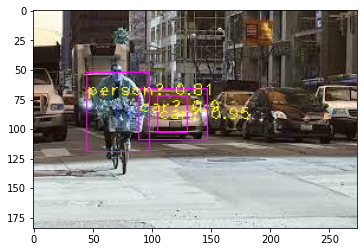

In [45]:
plt.imshow(img)